In [66]:
import numpy as np
import cv2
from skimage.transform import hough_circle, hough_circle_peaks


from matplotlib import pyplot as plt

In [67]:
rootpath = "../CASIA Iris Image Database (version 1.0)/001/1/001_1_3.bmp"

In [68]:
eye = cv2.imread(rootpath, 0)

In [69]:
cv2.imshow('image',eye)

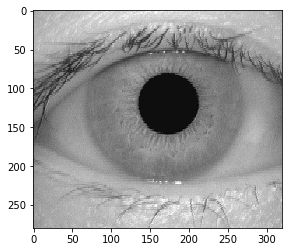

In [70]:
plt.imshow(eye,cmap = 'gray')
plt.show()

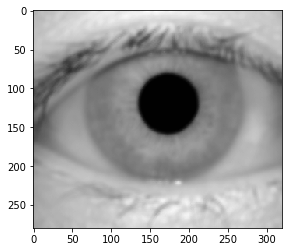

In [71]:
blured = cv2.bilateralFilter(eye,9,100,100)
plt.imshow(blured,cmap = 'gray')
plt.show()

In [72]:
print(blured.shape)
print(blured.sum(axis=0).shape)
print(blured.sum(axis=1).shape)

(280, 320)
(320,)
(280,)


In [73]:
Xp = blured.sum(axis=0).argmin()
Yp = blured.sum(axis=1).argmin()
print(blured.sum(axis=0).argmin())
print(blured.sum(axis=1).argmin())

181
107


In [74]:
x = blured[max(Yp - 60,0):min(Yp + 60,280), max(Xp - 60,0):min(Xp + 60,320)].sum(axis=0).argmin()
y = blured[max(Yp - 60,0):min(Yp + 60,280), max(Xp - 60,0):min(Xp + 60,320)].sum(axis=1).argmin()
print(x,y)

(58, 70)


In [75]:
Xp = max(Xp - 60,0)+x
Yp = max(Yp - 60,0)+y
print(Xp,Yp) 

(179, 117)


(172, 118, 38)


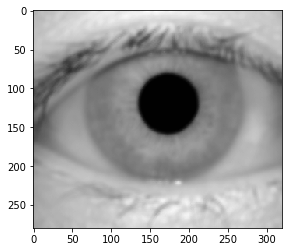

In [76]:
if Xp >= 100 and Yp >= 80: 
    blur = cv2.GaussianBlur(eye[Yp - 60:Yp + 60, Xp - 60:Xp + 60],(5,5),0)
    pupil_circles = cv2.HoughCircles(blur,cv2.HOUGH_GRADIENT, dp=1.2,minDist=200,param1=200,param2=12,minRadius=15,maxRadius=80)
    xp, yp, rp = np.round(pupil_circles[0][0]).astype("int")
    xp = Xp - 60 + xp
    yp = Yp - 60 + yp
print(xp, yp, rp)
plt.imshow(blured,cmap = 'gray')
plt.show()

In [77]:
pupil_circles[0][0]

array([ 53.40000153,  60.60000229,  37.92000198], dtype=float32)

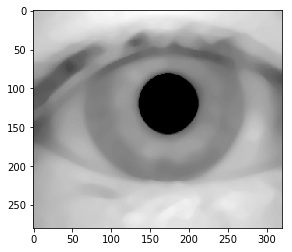

In [78]:
eye_copy = eye.copy()
rp = rp+7 #slightly enlarge the pupil radius makes a better result
blured_copy = cv2.medianBlur(eye_copy, 11)
blured_copy = cv2.medianBlur(blured_copy, 11)
blured_copy = cv2.medianBlur(blured_copy, 11)
plt.imshow(blured_copy,cmap = 'gray')
plt.show()

In [79]:
eye_edges = cv2.Canny(blured_copy, threshold1 = 15, threshold2 = 30, L2gradient=True)

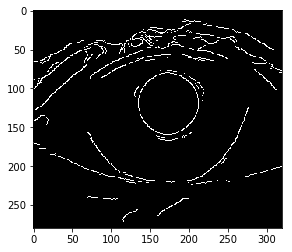

In [80]:
plt.imshow(eye_edges,cmap = 'gray')
plt.show()

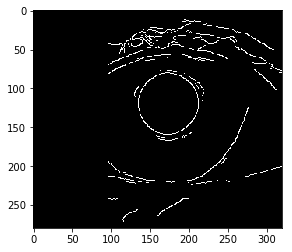

In [81]:
eye_edges[:,:xp - rp - 30] = 0
plt.imshow(eye_edges,cmap = 'gray')
plt.show()

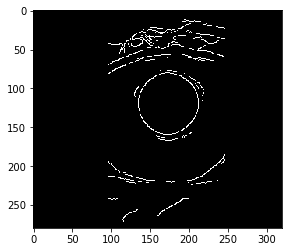

In [82]:
eye_edges[:,xp + rp + 30:] = 0
plt.imshow(eye_edges,cmap = 'gray')
plt.show()

In [83]:
hough_radii = np.arange(rp+45, 150, 2)
print hough_radii

[ 90  92  94  96  98 100 102 104 106 108 110 112 114 116 118 120 122 124
 126 128 130 132 134 136 138 140 142 144 146 148]


In [84]:
hough_res = hough_circle(eye_edges, hough_radii)

In [85]:
hough_res.shape

(30, 280, 320)

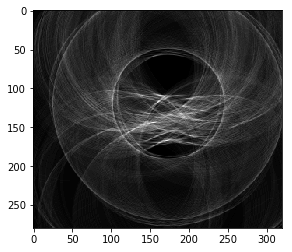

In [86]:
plt.imshow(hough_res[10],cmap = 'gray')
plt.show()

In [104]:
accums, xi, yi, ri = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)

In [105]:
print(accums, xi, yi, ri)


(array([ 0.15039062]), array([172]), array([134]), array([90]))


In [89]:
iris = []
iris.extend(xi)
iris.extend(yi)
iris.extend(ri)
if ((iris[0] - xp) ** 2+(iris[1]-yp)**2) ** 0.5 > rp* 0.3:
    iris[0] = xp
    iris[1] = yp

In [96]:
yp

118

In [97]:
eye_draw = cv2.imread(rootpath, 0)

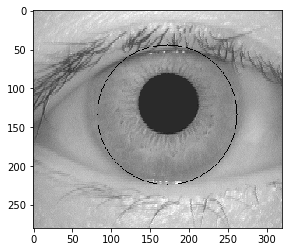

In [98]:
eye2=cv2.circle(eye_draw, (xi,yi), ri, [0,255,0], thickness=1, lineType=8, shift=0)
plt.imshow(eye2,cmap = 'gray')
plt.show()

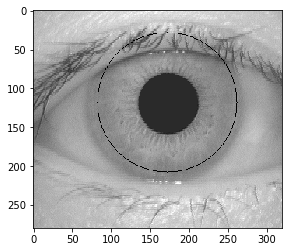

In [99]:
eye_draw = cv2.imread(rootpath, 0)
eye2=cv2.circle(eye_draw, (xp,yp), ri, [0,255,0], thickness=1, lineType=8, shift=0)
plt.imshow(eye2,cmap = 'gray')
plt.show()

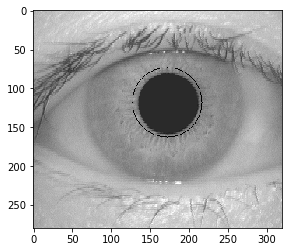

In [100]:
eye_draw = cv2.imread(rootpath, 0)
eye3=cv2.circle(eye_draw, (xp,yp), rp, [0,255,0], thickness=1, lineType=8, shift=0)
plt.imshow(eye3,cmap = 'gray')
plt.show()

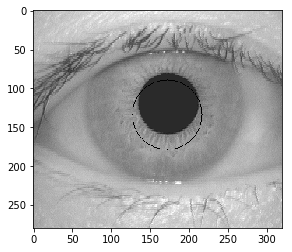

In [101]:
eye_draw = cv2.imread(rootpath, 0)
eye3=cv2.circle(eye_draw, (xi,yi), rp, [0,255,0], thickness=1, lineType=8, shift=0)
plt.imshow(eye3,cmap = 'gray')
plt.show()